In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [21]:
df = pd.read_csv('concrete_data.csv')

In [22]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [23]:
df.shape

(1030, 9)

In [24]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [26]:
X = df.drop(columns=['Strength'])
y = df.iloc[:,-1]


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Applying Regression Withot any Transformation

In [28]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2_score(y_test, y_pred)

0.6275531792314848

In [32]:
# cross checking with cross val score 
np.mean(cross_val_score(lr, X, y, scoring='r2'))

np.float64(0.4609940491662864)

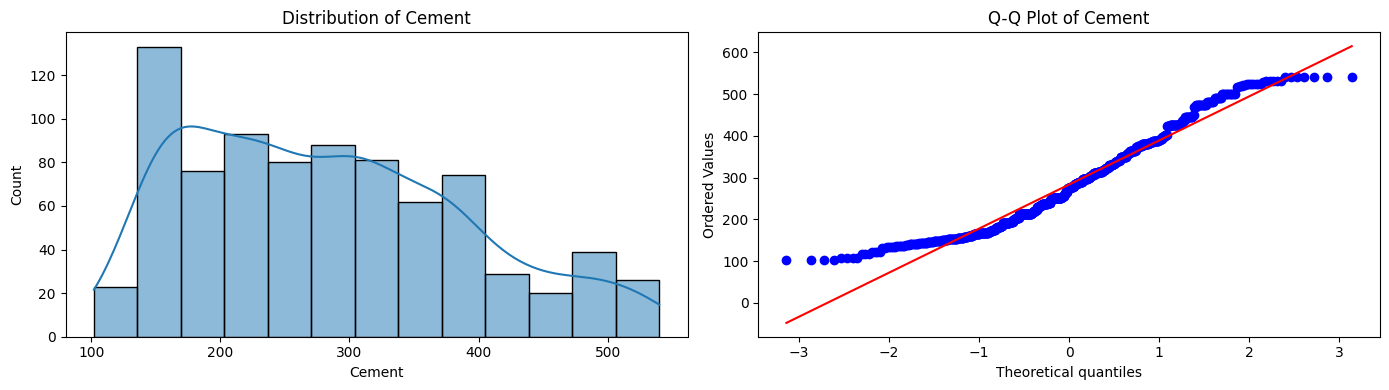

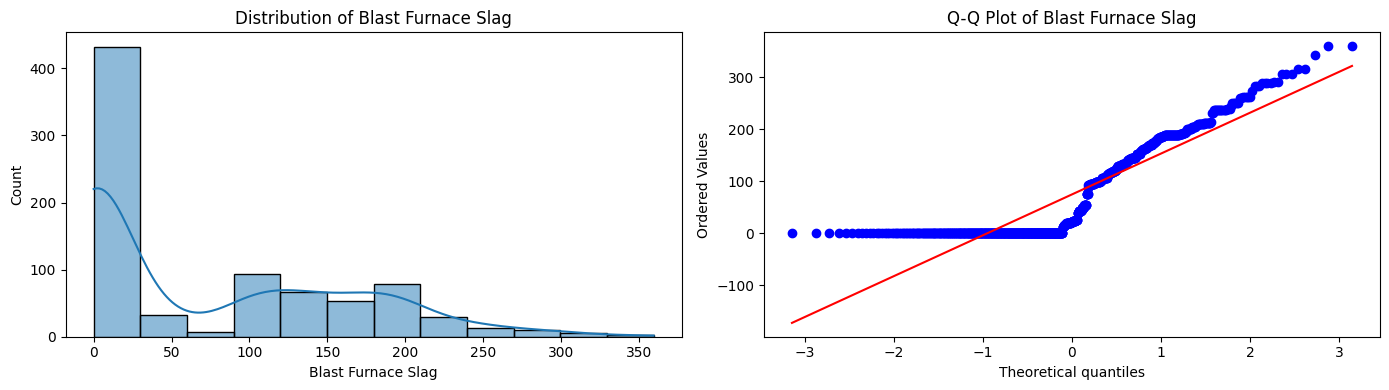

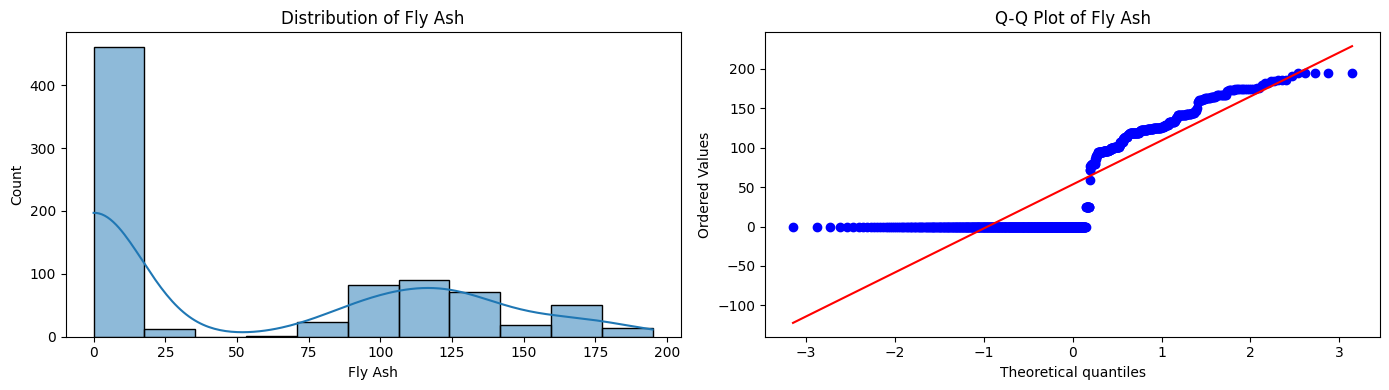

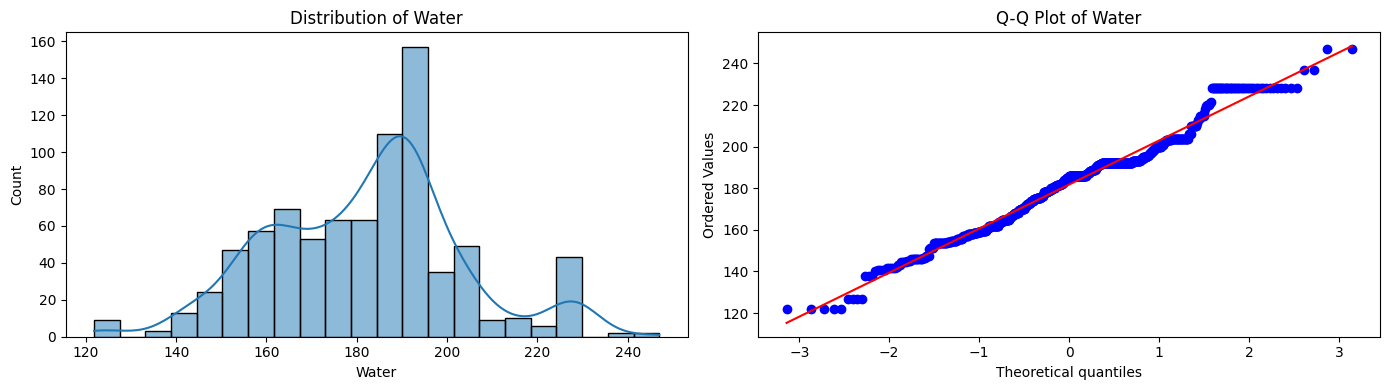

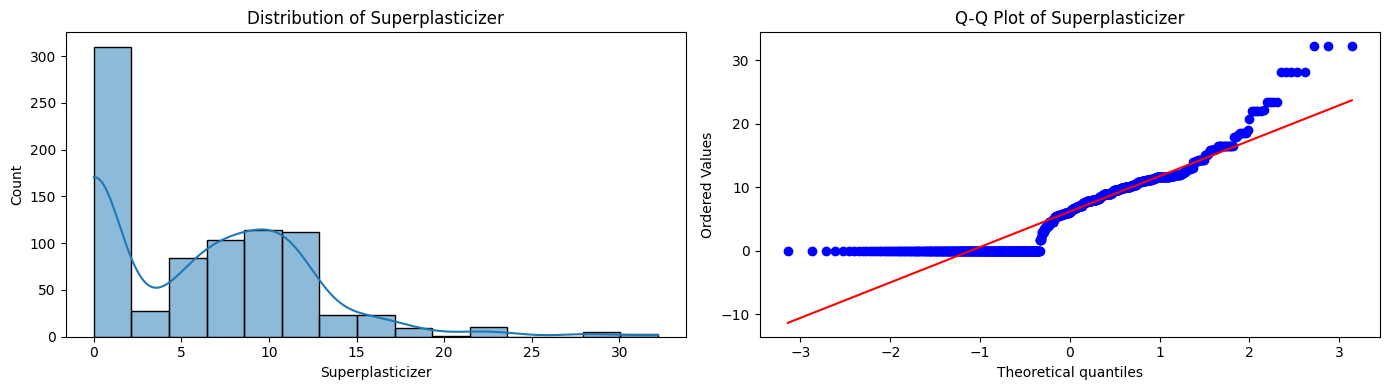

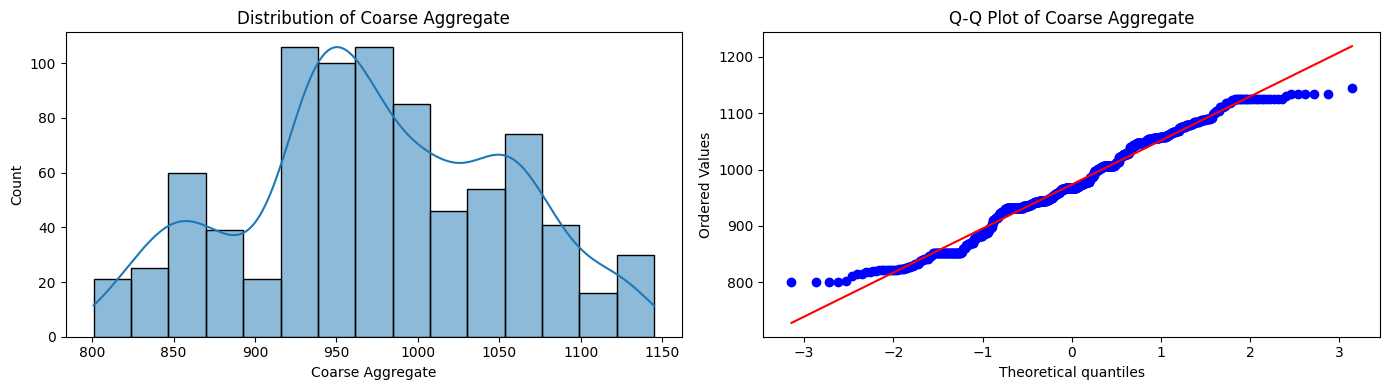

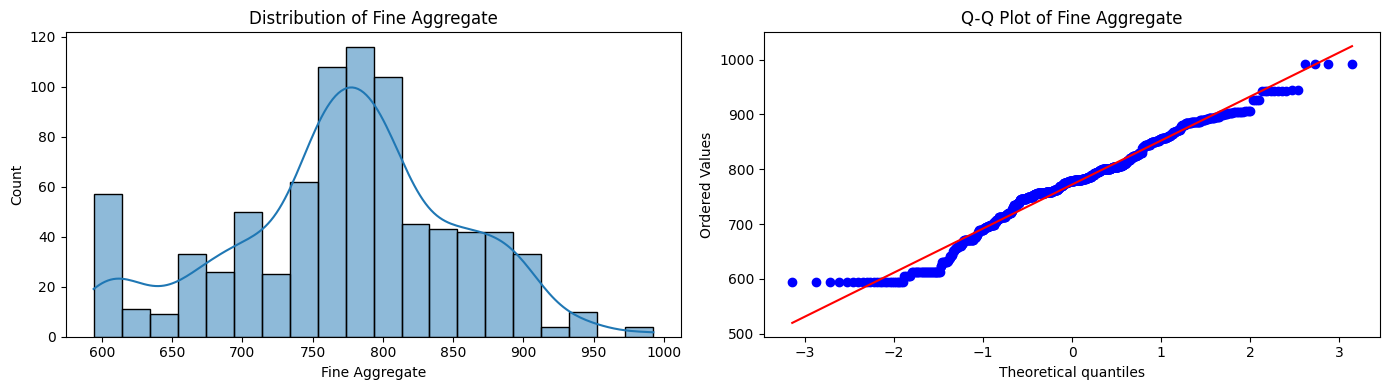

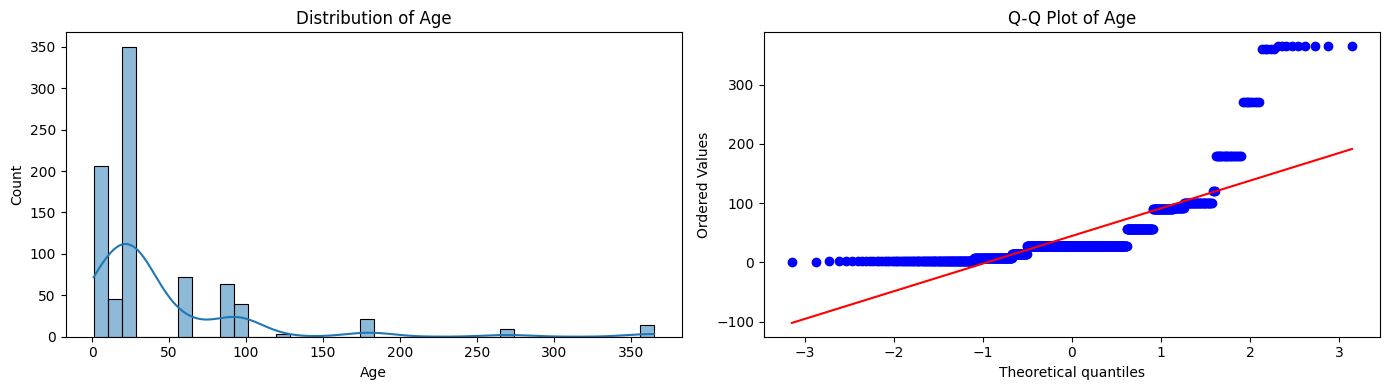

In [36]:
# Ploting the distplots without ant transformation
for col in X_train.columns:
    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Distribution of {col}')

    plt.subplot(122)
    stats.probplot(X_train[col], dist='norm', plot=plt)
    plt.title(f'Q-Q Plot of {col}')

    plt.tight_layout()
    plt.show()

# Applying BoX-CoX Transformation

In [39]:
pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train + 0.000001)  
X_test_transformed = pt.transform(X_test + 0.000001)

pd.DataFrame({'cols': X_train.columns, 'BoX-coX_lambdas': pt.lambdas_})


,cols,BoX-coX_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


Insights: Why using (X_train + 0.000001) because some fetures of X_train have 0  and 0 and negative value is not working in boX-coX transformation. So that is why we are using small value so it work properly.

In [42]:
# Applying Liear regression on transformed data
lr = LinearRegression()
lr.fit(X_train_transformed, y_train)

y_pred2 = lr.predict(X_test_transformed)
r2_score(y_test, y_pred2)

0.8047825005397713

Insights: After transformed the data using boX-coX, it gives better result than without transformed.

In [44]:
# Using cross val score
pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.000001)

lr = LinearRegression()
np.mean(cross_val_score(lr, X_transformed, y, scoring='r2'))

np.float64(0.666295031974616)

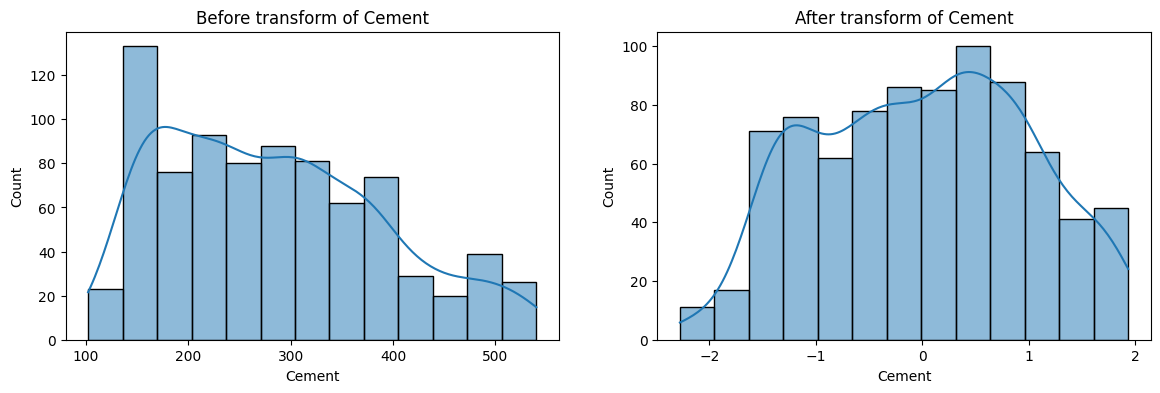

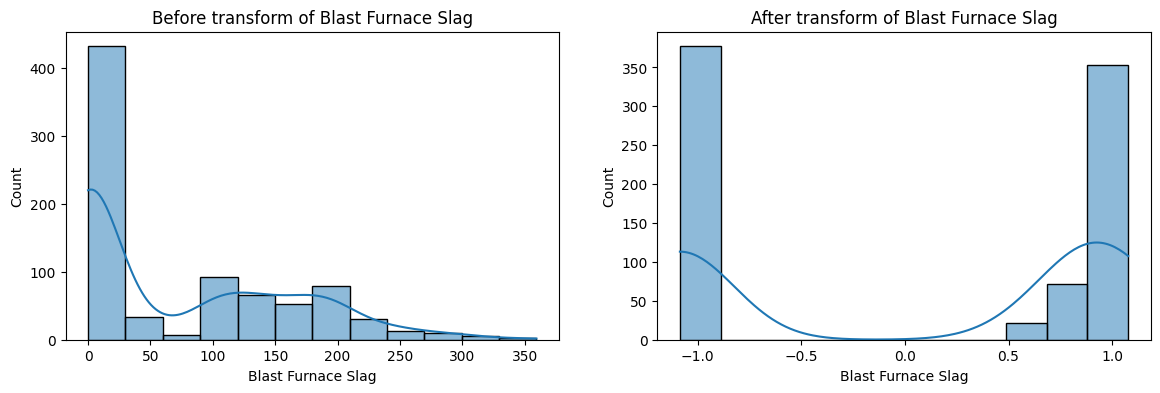

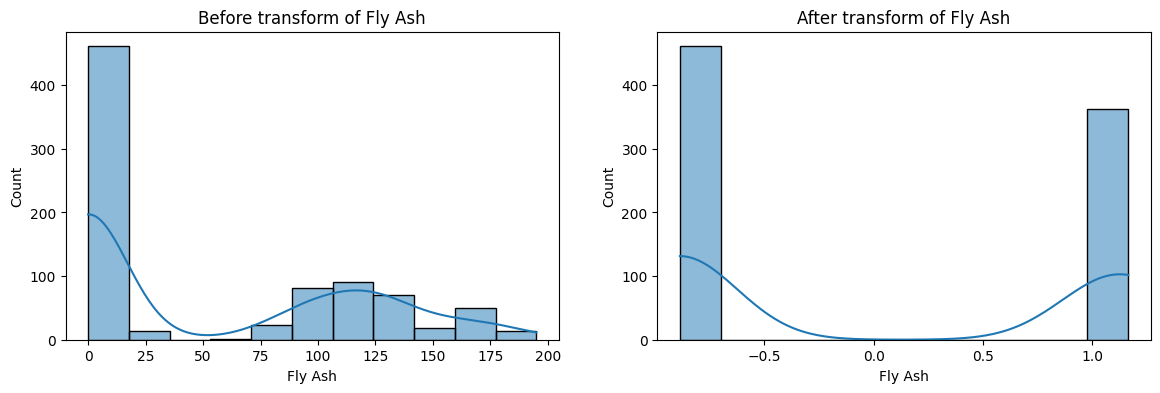

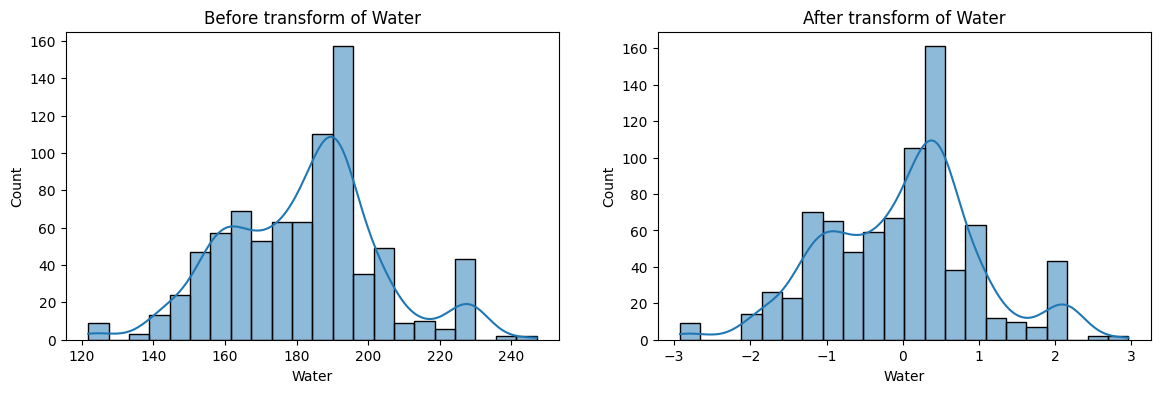

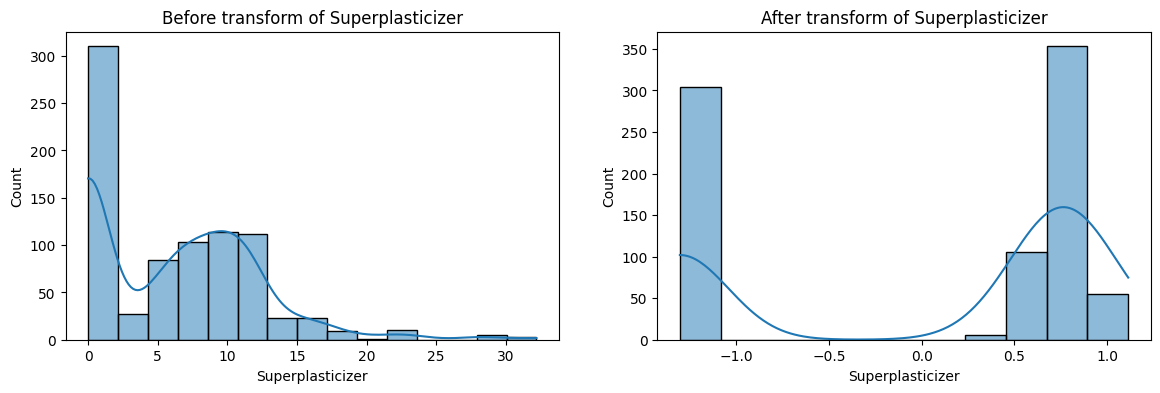

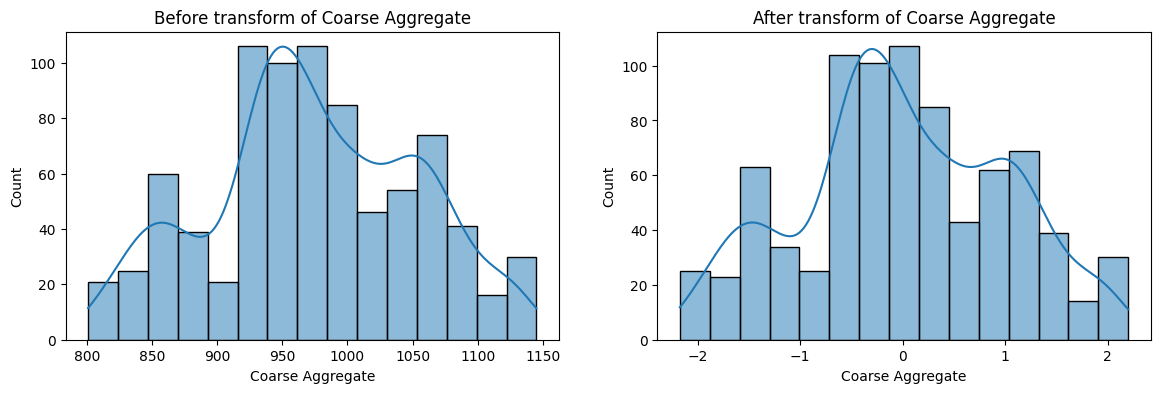

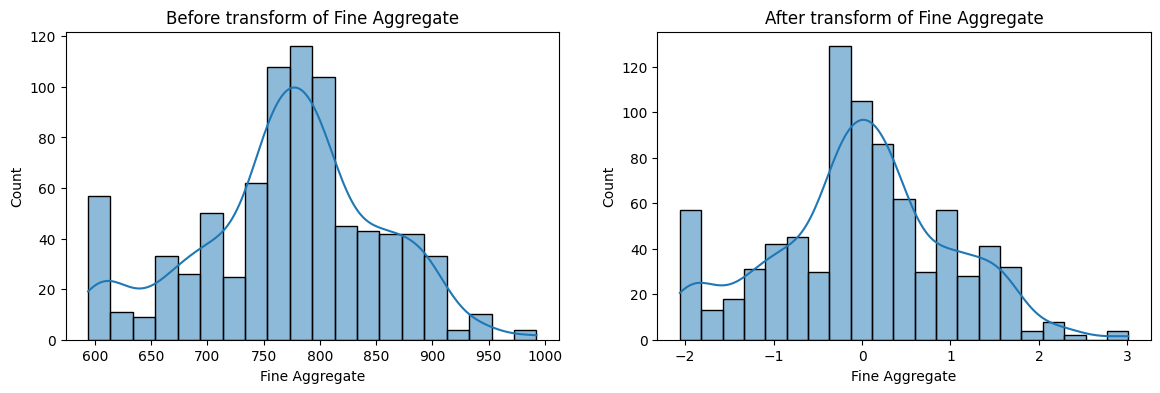

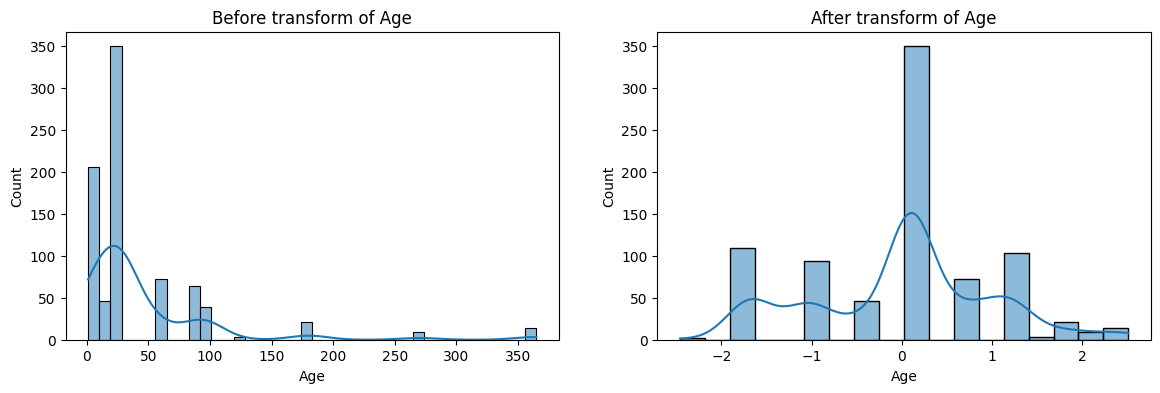

In [56]:
# Before and after comparision for BoX-coX plot
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Before transform of {col}')

    plt.subplot(122)
    sns.histplot(X_train_transformed[col], kde=True)
    plt.title(f'After transform of {col}')

    plt.show()


# Applying Yeo-Johnson Transformation

In [60]:
pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2, y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(f'R2 score: {r2_score(y_test, y_pred3)}')
pd.DataFrame({'Columns': X_train.columns, 'Yeo_Johnson_Lambdas': pt1.lambdas_})

R2 score: 0.8161906513339304


,Columns,Yeo_Johnson_Lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [61]:
# Cross val score 
pt1 = PowerTransformer()
X_transformed2 = pt1.fit_transform(X)

np.mean(cross_val_score(lr, X_transformed2,y, scoring='r2'))

np.float64(0.6834625134285748)

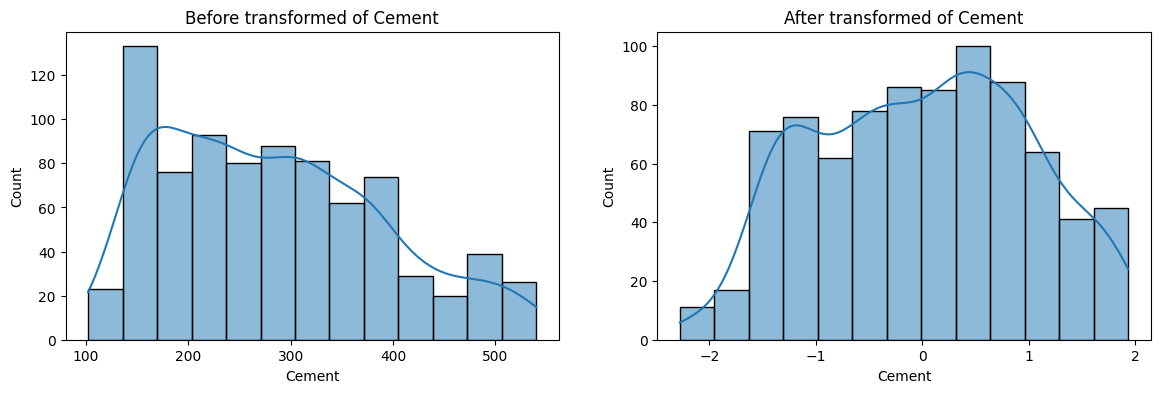

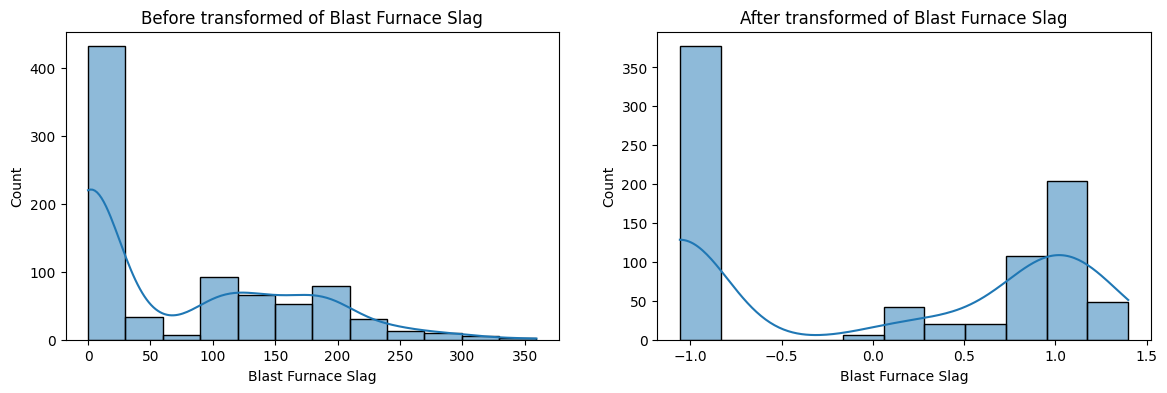

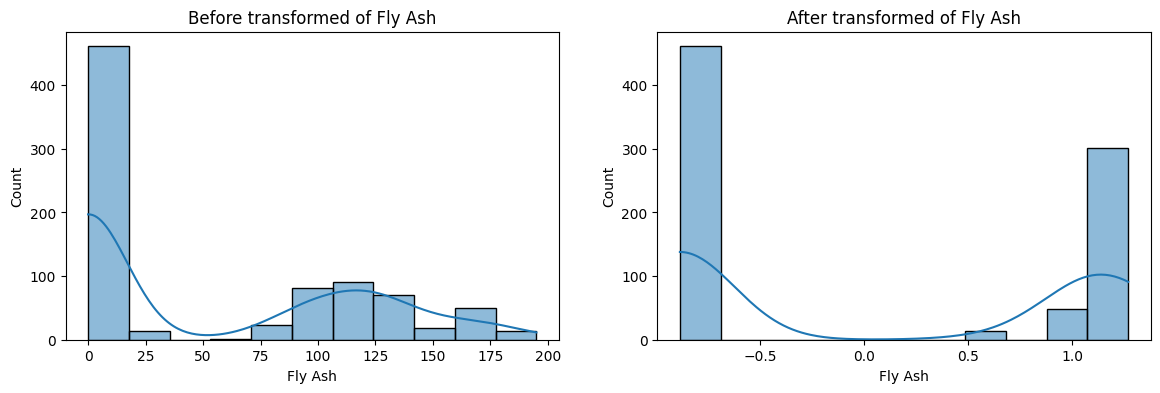

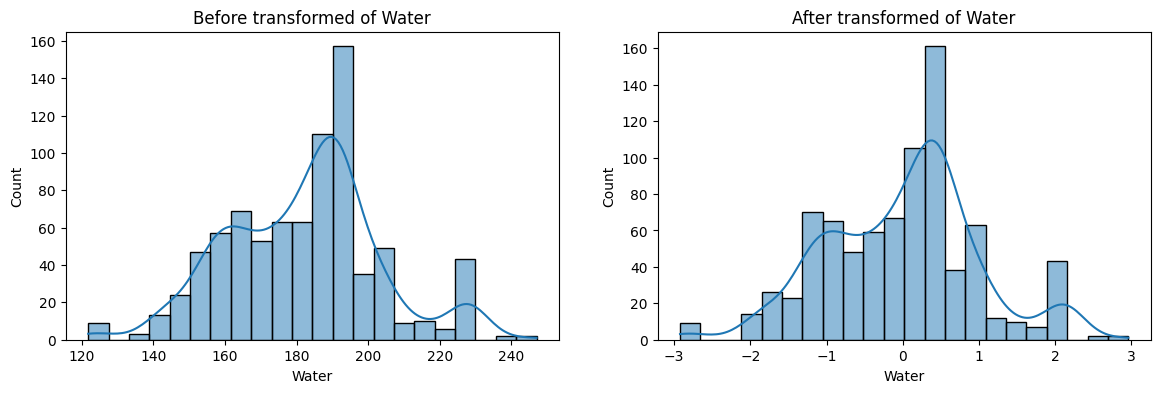

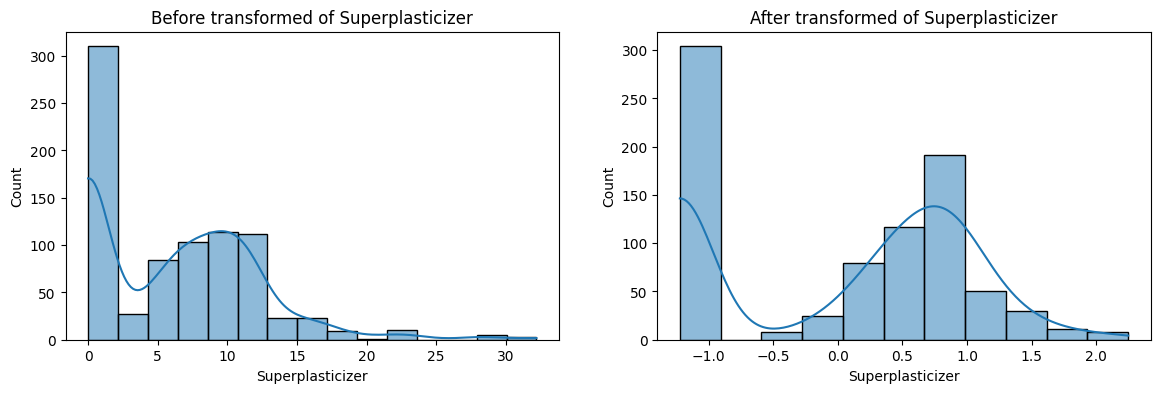

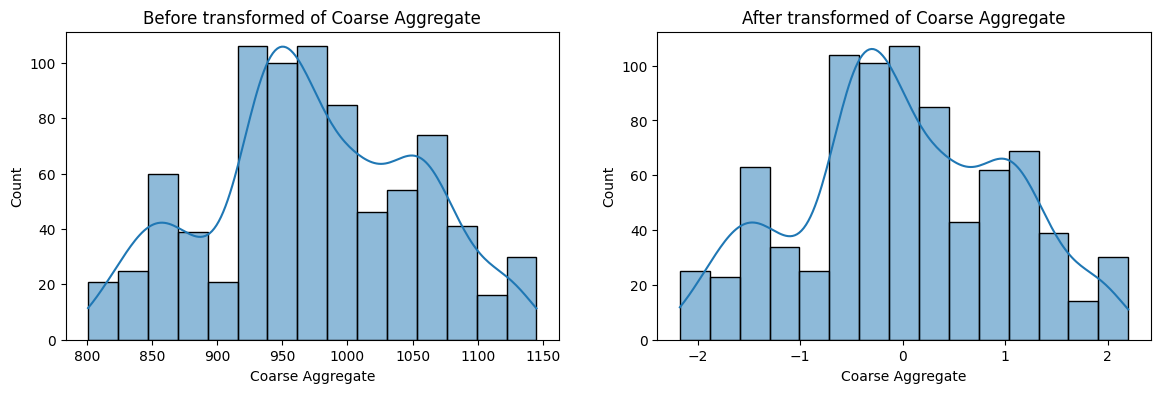

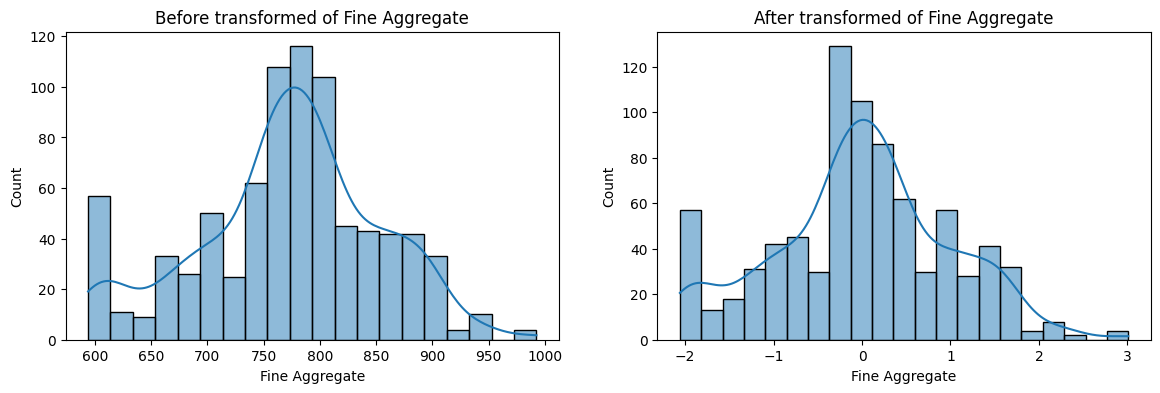

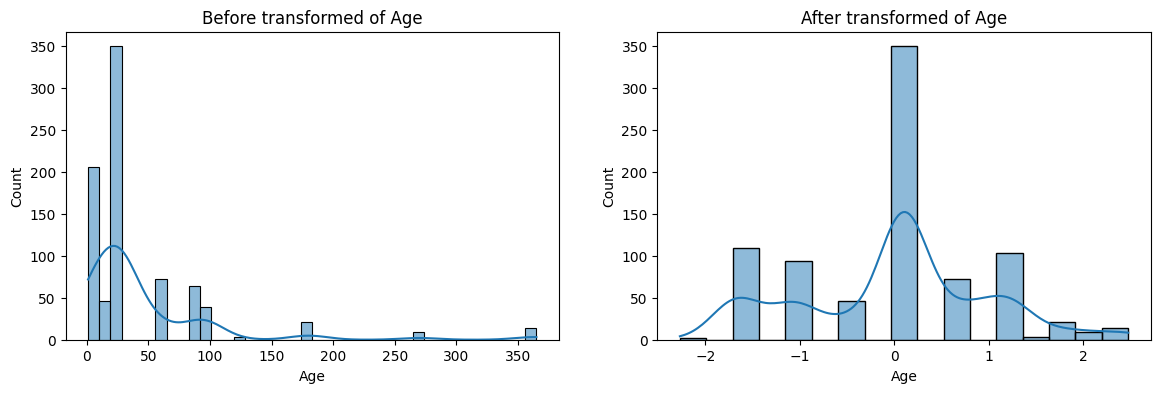

In [68]:
# Before and after comparision for Yeo-Johnson 
X_train_transformed2 = pd.DataFrame(X_train_transformed2, columns=X_train.columns)

for col in X_train_transformed2.columns:
    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Before transformed of {col}')

    plt.subplot(122)
    sns.histplot(X_train_transformed2[col], kde=True)
    plt.title(f'After transformed of {col}')

    plt.show()


In [69]:
#Side by side Lambdas 
pd.DataFrame({'cols': X_train.columns, 'BoX_coX_lamndas': pt.lambdas_, 'Yeo_Johnson_Lambdas': pt1.lambdas_})

,cols,BoX_coX_lamndas,Yeo_Johnson_Lambdas
0,Cement,0.172271,0.169544
1,Blast Furnace Slag,0.025273,0.016633
2,Fly Ash,-0.032412,-0.136480
3,Water,0.809568,0.808438
4,Superplasticizer,0.099711,0.264160
5,Coarse Aggregate,1.129168,1.129395
6,Fine Aggregate,1.829625,1.830763
7,Age,0.048975,0.001771
